# Telco - Data Analysis

## Presentation of the company, organization or specific problem

#### Telco is an important telecommunications company that requests a study of the behavior of users who hire its service and detection of patterns capable of predicting who could abandon the service, thus being able to anticipate through retention strategies.

## Research questions and objectives

#### The objective of the research is to segment the users who are most likely to abandon the service. For this, the following questions arise:
#### > Are there patterns that allow us to predict if the customer is going to leave the company?
#### > Is it possible from the conclusions to apply an action plan to reduce churn?

## Data Acquisition.

#### Source: https://www.kaggle.com/blastchar/telco-customer-churn
#### This Dataset provides a lot of information about users, has a clear target variable and does not have null or missing values, making the Data Wrangling task easier. Regarding the content, it presents demographic data of the clients, contracted services, billing and their active or abandoned status.

## EDA and Data Wrangling

#### We start from a dataset in .csv downloaded from its source in kaggle. The first thing we did was read and understand the data

### Import of libraries, reading of the CSV and global information of the data

In [88]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import requests
import json

df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [89]:
# shape of DF
df.shape

(7043, 21)

In [90]:
# Info (count, type, nulls) about DF
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [91]:
# unique values:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [92]:
# Numeric columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


### Data history

#### Based on reading the data and research on it, we are able to describe what each data means:
##### customerID: Customer ID
##### gender: If the client is male or female
##### SeniorCitizen: If the client is an older adult or not (1, 0)
##### Partner: If the client has a partner or not (Yes, No)
##### Dependents: Whether the client has dependents or not (Yes, No)
##### tenure: Number of months the client has been with the company
##### PhoneService: Whether the customer has phone service or not (Yes, No)
##### MultipleLines: Whether the customer has multiple lines or not (Yes, No, No phone service)
##### InternetService: Customer's Internet Service Provider (DSL, Fiber Optic, No)
##### OnlineSecurity: Whether the client has online security or not (Yes, No, No Internet service)
##### OnlineBackup: Whether the client has online backup or not (Yes, No, No Internet service)
##### DeviceProtection: Whether the client has device protection or not (Yes, No, No Internet service)
##### TechSupport: If the client has technical support or not (Yes, No, No internet service)
##### StreamingTV: Whether the client has streaming TV or not (Yes, No, No Internet service)
##### StreamingMovies: Whether the client has streaming movies or not (Yes, No, No Internet service)
##### Contract: The term of the client's contract (Month to month, One year, Two years)
##### PaperlessBilling: If the client has electronic billing or not (Yes, No)
##### PaymentMethod: The customer's payment method (Electronic Check, Mailed Check, Bank Transfer (automatic), Credit Card (automatic))
##### MonthlyCharges: The amount charged to the customer monthly
##### TotalCharges: The total amount charged to the customer.
##### Churn: Whether the client abandoned or not (Yes or No) VARIABLE TARGET

### Data transformation

In [93]:
# Field renaming to normalize case::
df = df.rename(columns={'customerID':'CustomerID',
                   'gender':'Gender',
                   'tenure':'Tenure'})

# data type conversion
df['SeniorCitizen'] = df['SeniorCitizen'].astype('bool')

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

df['Churn'] = df['Churn'].map({'Yes':True, 'No':False})
df['Partner'] = df['Partner'].map({'Yes':True, 'No':False})
df['Dependents'] = df['Dependents'].map({'Yes':True, 'No':False})
df['PhoneService'] = df['PhoneService'].map({'Yes':True, 'No':False})
df['OnlineSecurity'] = df['OnlineSecurity'].map({'Yes':True, 'No':False})
df['PaperlessBilling'] = df['PaperlessBilling'].map({'Yes':True, 'No':False})

### Univariate analysis

##### I display the results of the numerical variables, leaving the categorical ones to analyze bivariately

#### Univariate analysis - Monthly charges

<AxesSubplot:xlabel='MonthlyCharges'>

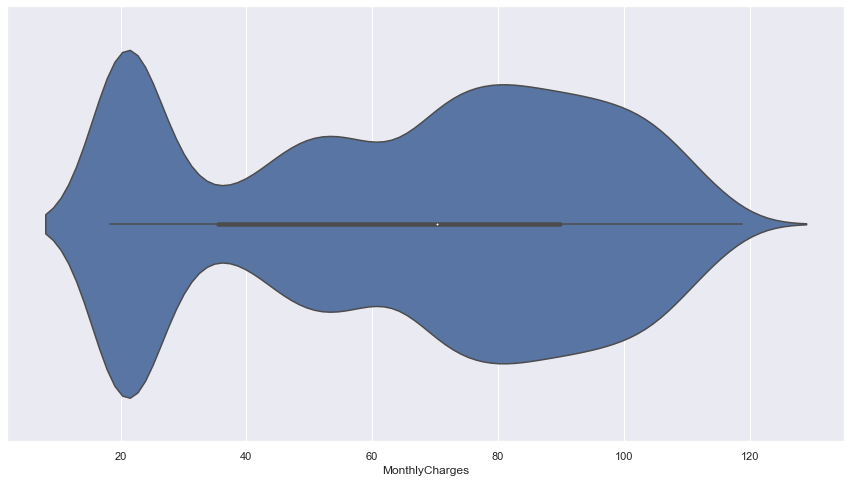

In [94]:
# Global settings of plots
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(15,8)})

# Violin plot (Allows you to observe the frequency and its distribution)
sns.violinplot(x = df['MonthlyCharges'])

#### Univariate analysis - Permanence in the company (tenure)

[Text(0.5, 0, 'Meses'),
 Text(0, 0.5, 'Frecuencia'),
 Text(0.5, 1.0, 'Tiempo de permanencia')]

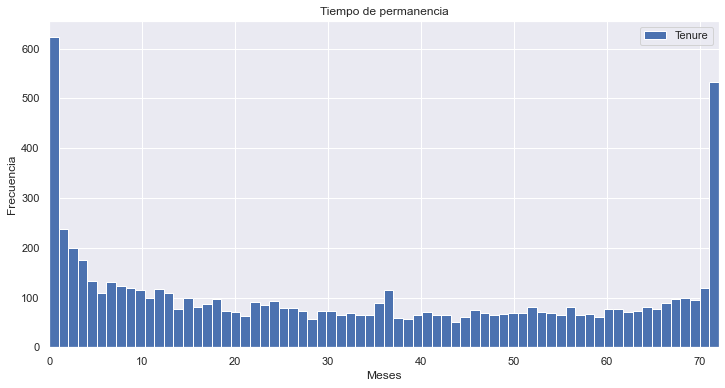

In [98]:
ax = df[['Tenure']].plot(kind = "hist", bins=70, figsize=(12, 6), xlim=[0, df.Tenure.max()])
ax.set(xlabel = "months", ylabel = "Frequency", title = "Tenure")

##### We find here a "bimodal" type distribution, that is, a strong frequency of customers who have stayed for a very short time and, in turn, another strong inclination towards those who have stayed longer. We do not know for sure if the values in 0 correspond to data entry errors or perhaps to some promotion of free service for 1 month.

### Bivariate analysis

##### We analyze how the variables behave with each other and with respect to the target variable to try to find relationships or patterns.

#### Bivariate analysis - Payment method VS abandonment

<AxesSubplot:title={'center':'Métodos de pago y abandono'}, xlabel='PaymentMethod'>

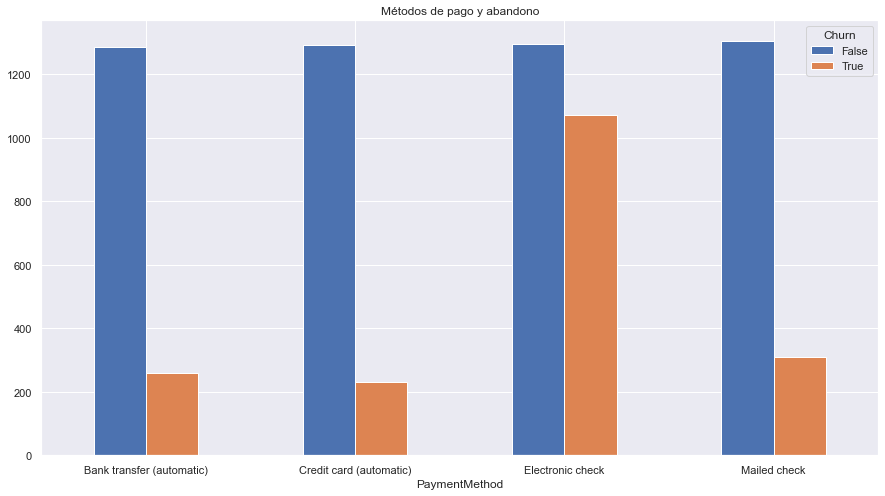

In [100]:
df3 = df.groupby(['PaymentMethod','Churn']).size()
df3 = df3.unstack()
df3.plot(kind='bar', rot='0', title = "Payment Method and Churn")

#### Bivariate analysis - Payment method VS Monthly payment VS abandonment

[Text(0.5, 0, 'Metodos de pago'),
 Text(0, 0.5, 'Abono mensual'),
 Text(0.5, 1.0, 'Densidad de pagos segun metodo de pago')]

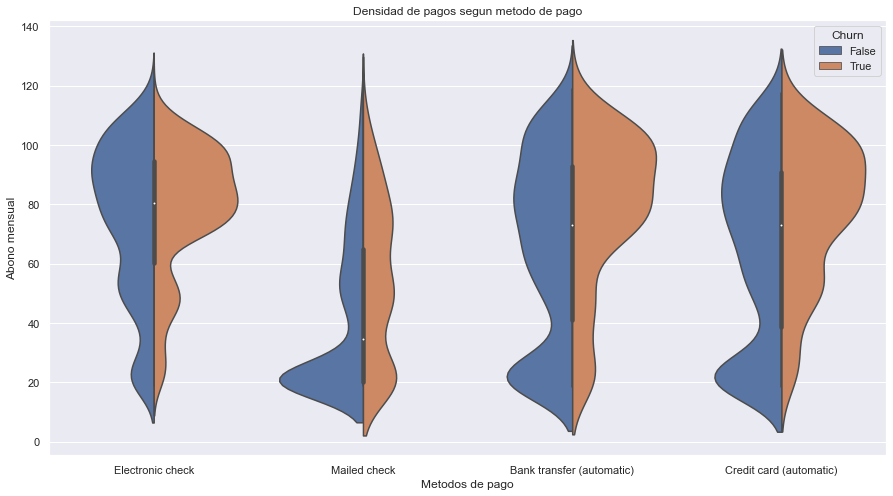

In [101]:
ax = sns.violinplot(x = 'PaymentMethod', y = 'MonthlyCharges', data = df, hue = 'Churn', split = True)
ax.set(xlabel = "Payment Method", ylabel = "Monthly Charges", title = "Density of payments according to payment method")

##### It is concluded that dropouts are concentrated in high collection areas and even more pronounced in electronic check payment methods

#### Bivariate analysis - Monthly collections vs Time of permanence and Abandonment

<AxesSubplot:xlabel='Tenure', ylabel='MonthlyCharges'>

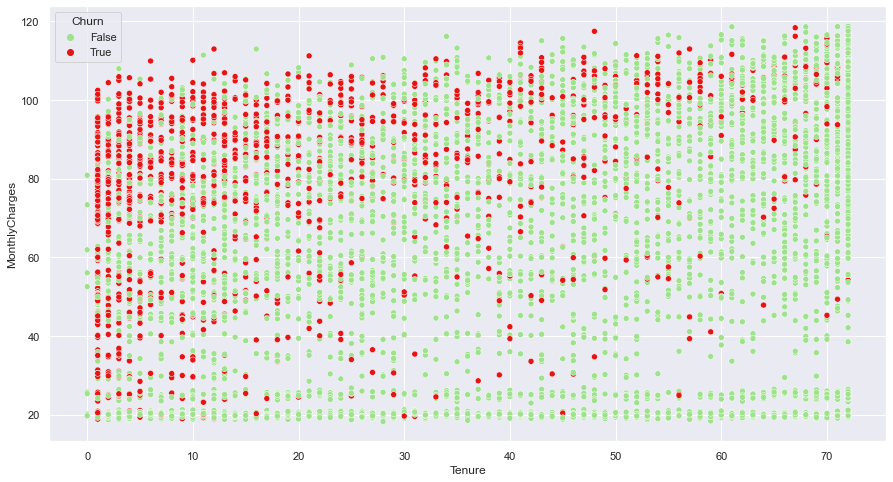

In [102]:
sns.scatterplot(data=df, x="Tenure", y="MonthlyCharges", hue="Churn", palette=['#9FE28D','#E51515'])

##### It is observed with an appreciable trend that users who abandon usually have large charges. In addition, a high concentration is observed in the first months of permanence, which suggests that high prices in the first months drive customers away.

#### Bivariate analysis - Contract VS Length of stay

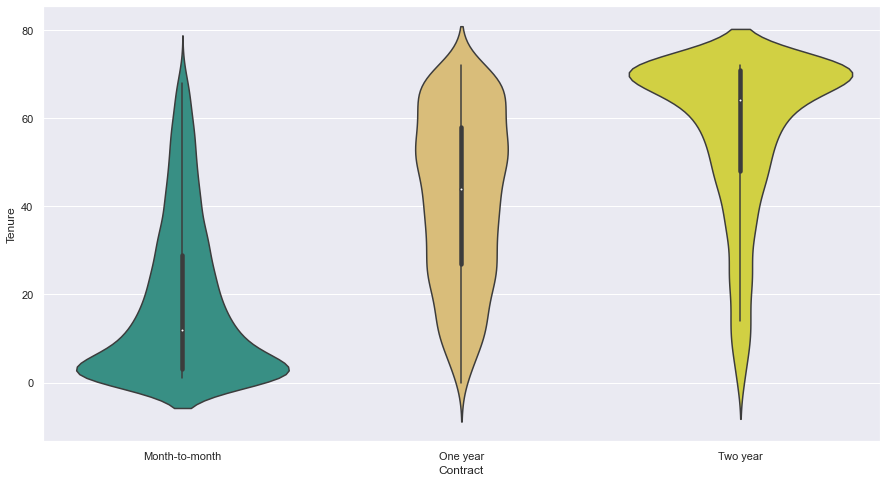

In [103]:
ax = sns.violinplot (x = 'Contract', y = 'Tenure', data = df, palette=['#2a9d8f','#e9c46a','#e8e72c'])

#### Bivariate analysis - Contract VS abandonment

<AxesSubplot:xlabel='Contract'>

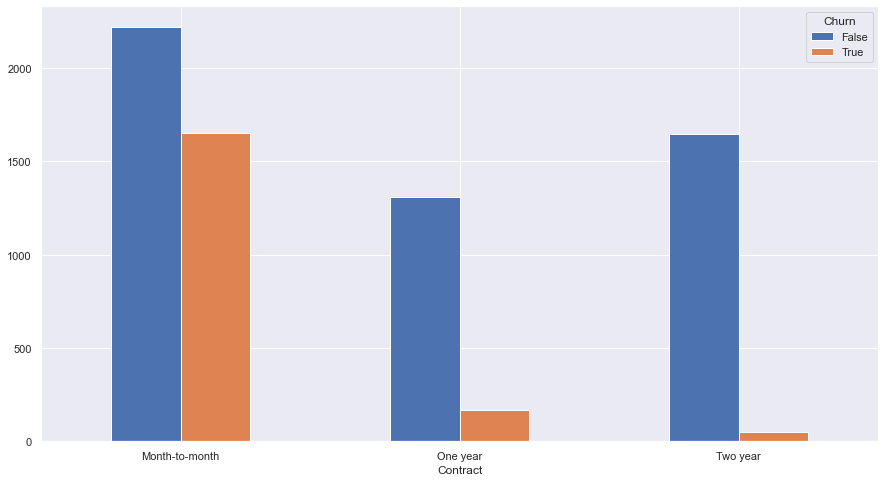

In [104]:
# Affected by the type of abandonment
df4 = df.groupby(['Contract','Churn']).size()
df4 = df4.unstack()
df4.plot(kind='bar', rot='0')

#### Bivariate analysis - Contract AND permanence AND abandonment

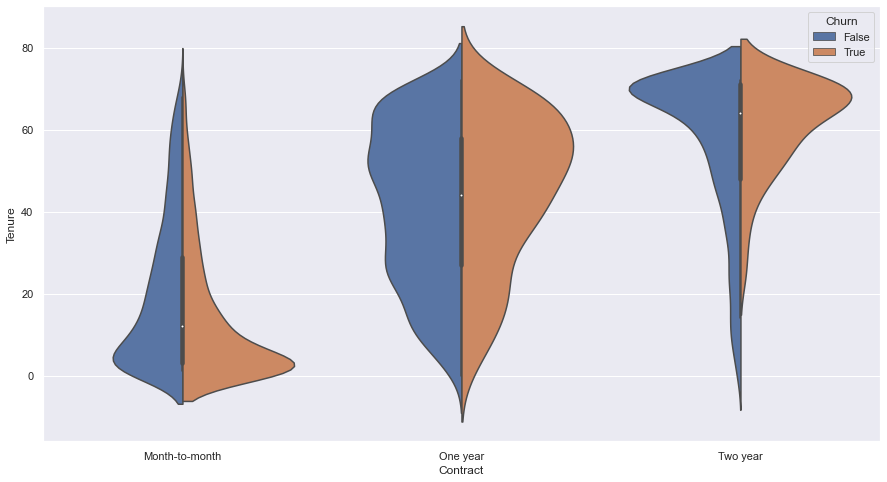

In [105]:
ax = sns.violinplot(x = 'Contract', y = 'Tenure', data = df, hue = "Churn", split = True)

##### From these last 3 graphs it can be determined that the longer the term of the contract, the greater the permanence it will have and therefore the less probability of abandonment

#### Bivariate analysis - Contract VS Churn

<AxesSubplot:title={'center':'¿Recibe soporte técnico?'}, xlabel='TechSupport'>

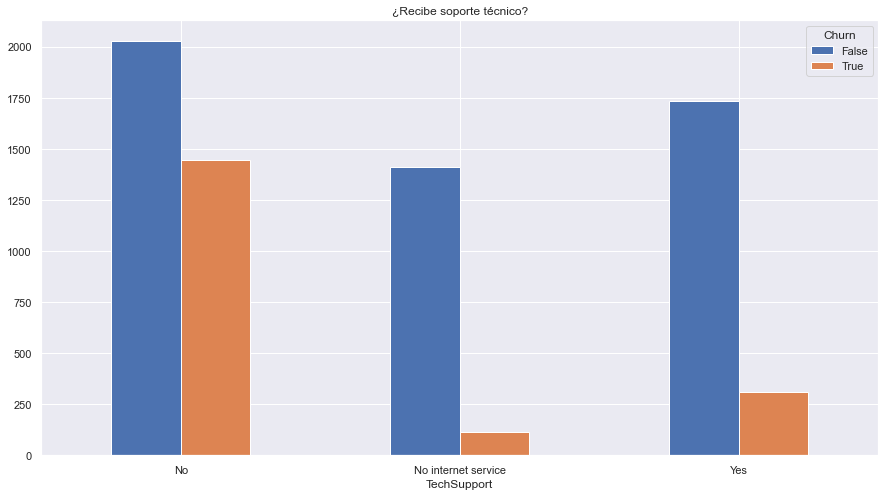

In [106]:
df5 = df.groupby(['TechSupport','Churn']).size()
df5 = df5.unstack()
df5.plot(kind='bar', rot='0', title="¿Does the client receive technical support?")

##### It is evident that those users who have internet service and do not receive support, have a tendency to leave the company

#### Bivariate analysis - Technical Support VS Churn

<AxesSubplot:title={'center':'¿Recibe soporte técnico?'}, xlabel='InternetService'>

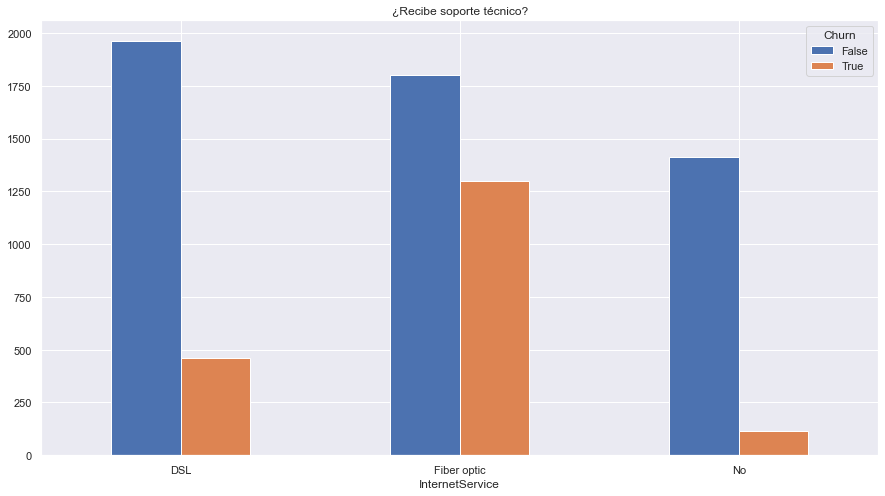

In [107]:
df6 = df.groupby(['InternetService','Churn']).size()
df6 = df6.unstack()
df6.plot(kind='bar', rot='0', title="¿Does the client receive internet service?")

##### It can be seen that the fiber optic service is linked to higher dropouts than DSL, this service being the weak point in terms of user desertion

### Multivariate analysis

#### Multivariate analysis - Search for correlations with heat map

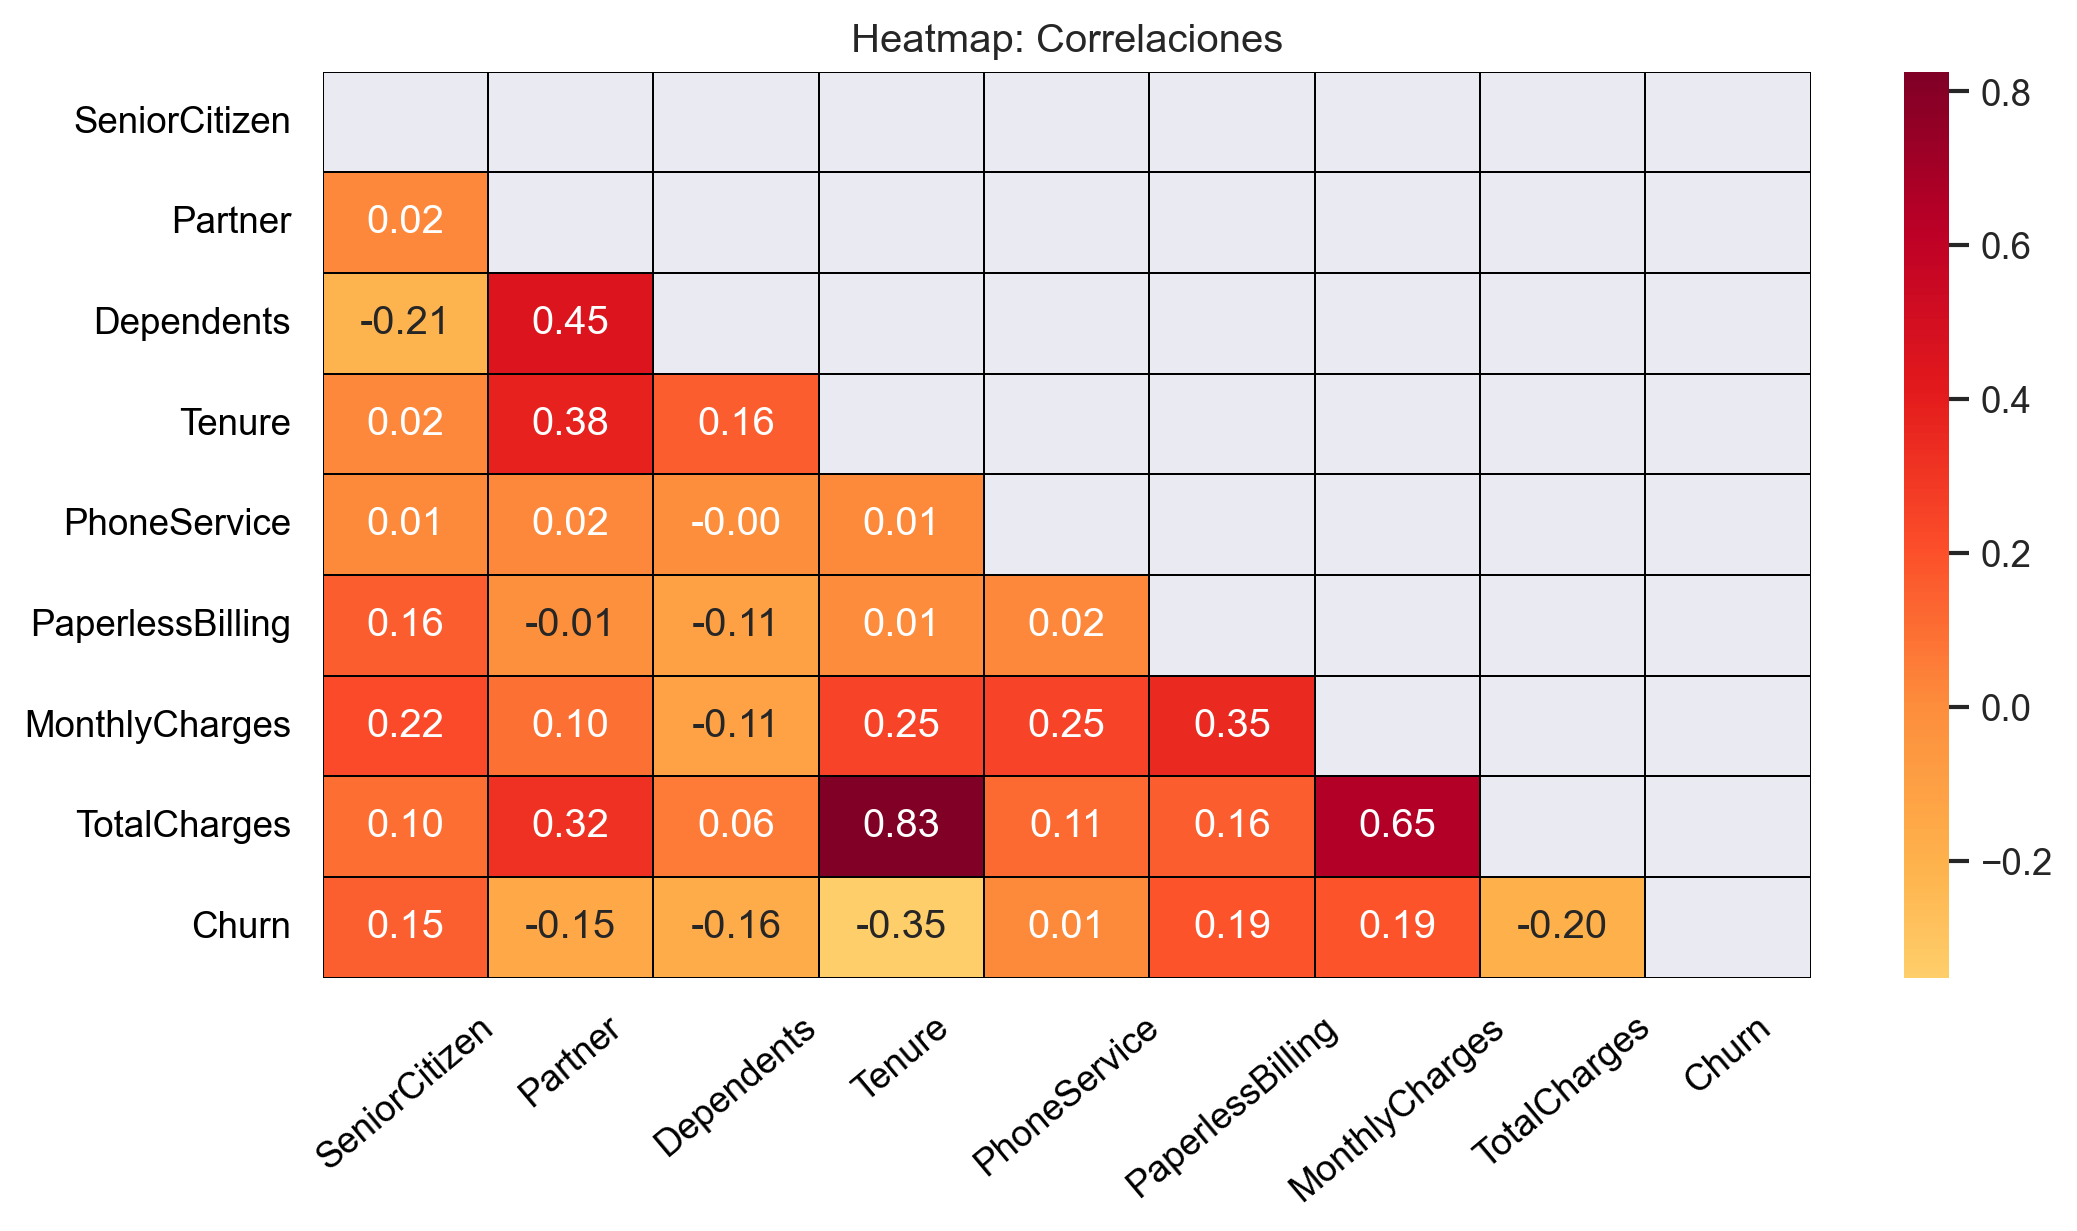

In [108]:
plt.figure ( dpi = 240, figsize = (10,5))

mask = np.triu(np.ones_like(df.corr(),dtype = bool))

sns.heatmap(df.corr(), mask = mask, center=0, fmt = ".2f",annot=True, linewidth=0.1, linecolor='black', cmap = 'YlOrRd')
plt.yticks(rotation = 0, color='black')
plt.xticks(rotation = 40, color='black')
plt.title('Heatmap: correlations')
plt.show()

##### There is a strong correlation between the number of months that the client has stayed and the total amount that they have been paying, which is consistent. The number of months and the monthly charges for use of the service are interpreted in the same way. We consider here the possibility of eliminating the TotalCharges variable. To be sure we should see if there is a bias between dropouts.

#### Multivariate analysis - Total charge with respect to length of stay, according to target

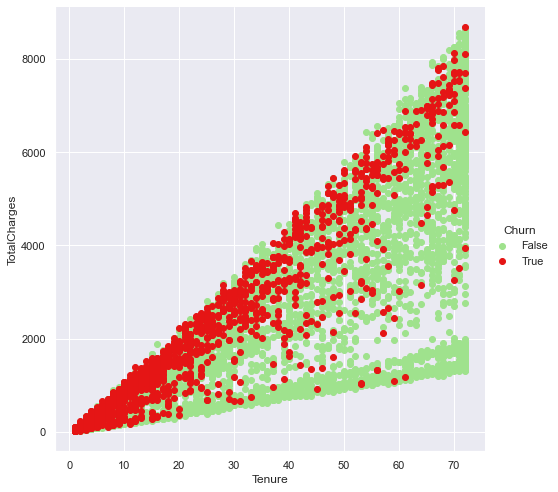

In [111]:
sns.FacetGrid(df,hue = 'Churn' , height = 7, palette=['#9FE28D','#E51515']).map(plt.scatter,'Tenure','TotalCharges').add_legend()
plt.show()

##### It is possible to notice that for those users who abandoned the service, the growth slope is greater and is almost concentrated, while those who continue manage a wide dispersion spectrum. Despite providing this indicator, it is not providing relevant information, since we obtained a similar conclusion by analyzing the monthly amounts, therefore the "Total Charges" variable can be discarded and thus reduce the dimensionality.

## Next steps

#### Once the data was analyzed and how its variables are interrelated, we were able to obtain several conclusions and discover patterns that will be useful to us. when predicting user attrition. We trust that we will be able to put together a good predictive model.